In [1]:
import numpy as np
import matplotlib.pyplot as plt
#########RED########################
from keras.datasets import imdb
from keras import models,layers,optimizers


In [2]:
### IMPORTAMOS LOS DATOS A USAR #############

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) ## DESCARGAMOS SOLO 10000 datos

In [3]:
## OBSERVEMOS LA INFORMACIÓN

print(train_data.shape) ## 25000 EJEMPLOS NUMERICOS PERO QUE REPRESENTAN PALABRAS, 
print(len(train_data[0]))
train_data[0]

(25000,)
218


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
## Y EN LA SALIDA TENEMOS SELECCIONES BINARIAS:
train_labels[0]

1

In [5]:
## OBSERVEMOS AHORA QUE SON ESOS DATOS MEDIANTE LA LIBRERIA IMDB

word_index=imdb.get_word_index() ## DESCARGAMOS EL CODIGO DE TRADUCCIÓN DE LAS PALABRAS

In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
## AHORA NOSOTROS QUEREMOS REORGANIZAR LOS DATOS DE TAL MANERA QUE LA LLAVE SEA EL VALOR NUMERICO
## CON LO CUAL TENEMOS:
word_index=dict([(value,key)for(key,value)in word_index.items()])
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
## traduscamos los datos

for i in train_data[0]:
    print(word_index.get(i-3)) ## LOS PRIMEROS 3 DEL WORD INDEX SON PALABRAS RESERVADAS

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [9]:
# KERAS Y NUMPY SOLO ACEPTA TENSORES, ESTRUCTURAS VECTORIALES, NOSOTROS TENEMOS LISTAS, # ADEMAS NUMERO DE TIPO FLOTANTE
def vectorizar(sequences, dim=10000):
    results=np.zeros((len(sequences),dim))
    for i ,sequences in enumerate(sequences):
        results[i,sequences]=1
    return results

In [10]:
X_train=vectorizar(train_data) ## ESTO ME PERMITE ORGANANIZAR LOS DATOS DE TAL FORMA QUE TENGO 25000 EJEMPLOS
## CODIFICANDO LA INFORMACIÓN EN UN ARREGLO DONDE SALE 1 DONDE LA PALABRA EXISTA
x_test=vectorizar(test_data)

### AHORA LO CONVERTIMOS A NUMEROS FLOTANTES

y_train=np.asarray(train_labels).astype("float32") ## SIEMPRE QUE PUEDAS PASAR LOS DATOS A FLOAT32
y_test=np.asarray(test_labels).astype("float32")  ## ojoooo

In [11]:
### GENERAMOS EL MODELO EL MODELO
model=models.Sequential()
### ESTRUCTURAS DE SED DE DATOS GENERALENTE SE TRABAJAN CON CAPAS DENSAS
model.add(layers.Dense(16,activation="relu",input_shape=(10000,))) ## 10000 LAS PALABRAS QUE TIENE PARA LA CLASIFICACIÓN
model.add(layers.Dense(16,activation="relu")) ## PARA LAS DEMAS NO NECESITO SABER LAS ENTRADAS PORQUE SON DENSAS
model.add(layers.Dense(16,activation="relu")) ## PARA LAS DEMAS NO NECESITO SABER LAS ENTRADAS PORQUE SON DENSAS
model.add(layers.Dense(1,activation="sigmoid")) ## NECESITAMOS SABER SOLAMENTE SI ES CERO O UNO POR ENDE ESCOGEMOS SIGMOID

In [12]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics="accuracy")

In [13]:
## SEPARAMOS NUESTRO SED DE DATOS LA SECCION DE ENTRENO EN ENTRENO Y VALIDACIÓN:

X_val=X_train[:10000]
partial_X_train=X_train[10000:]

Y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [14]:
history=model.fit(partial_X_train,partial_y_train,epochs=10,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/10
30/30 [==============================] - 15s 185ms/step - loss: 0.5611 - accuracy: 0.7682 - val_loss: 0.4161 - val_accuracy: 0.8679
Epoch 2/10
30/30 [==============================] - 1s 45ms/step - loss: 0.3294 - accuracy: 0.8980 - val_loss: 0.3148 - val_accuracy: 0.8842
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2298 - accuracy: 0.9243 - val_loss: 0.2935 - val_accuracy: 0.8816
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1782 - accuracy: 0.9409 - val_loss: 0.2749 - val_accuracy: 0.8912
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1435 - accuracy: 0.9537 - val_loss: 0.3232 - val_accuracy: 0.8741
Epoch 6/10
30/30 [==============================] - 1s 46ms/step - loss: 0.1153 - accuracy: 0.9654 - val_loss: 0.3177 - val_accuracy: 0.8807
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0977 - accuracy: 0.9694 - val_loss: 0.3237 - val_accuracy: 0.8814
Epoch 8/10


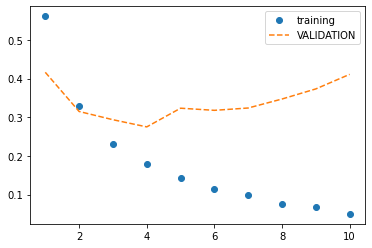

In [15]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

PODEMOS OBSERVAR QUE EN LA SECCION DE TRAINING SE ACERCO A UN ERROR NO TAN ALTO SIN EMBARGO, QUE SUCEDE PARA LOS DATOS DE VALIDACIÓN, TENEMOS ERRORES BASTANTE ALTOS, APESAR DEL BUEN ENTRENO DEL SISTEMA, ESTO SUCEDE POR EL OVERFITTING, LO CUAL QUIERE DECIR QUE LA RED SE APRENDIO LOS DATOS MAS NO GENERALIZO EL SISTEMA.

In [16]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 11s 4ms/step - loss: 0.4611 - accuracy: 0.8610


[0.4610505998134613, 0.8610399961471558]

PODEMOS OBSERVAR QUE YA CON LOS DATOS DE TESTEO SE PRESENTA UNA APROXIMACIÓN DE 87% QUE ES BUENO, PERO MIREMOS QUE PASA SI NO TUVIERAMOS OVERFITTING.

In [17]:
##MODELO MENOS COMPLEJO
### GENERAMOS EL MODELO EL MODELO
model2=models.Sequential()
### ESTRUCTURAS DE SED DE DATOS GENERALENTE SE TRABAJAN CON CAPAS DENSAS
model2.add(layers.Dense(4,activation="relu",input_shape=(10000,))) ## 10000 LAS PALABRAS QUE TIENE PARA LA CLASIFICACIÓN
model2.add(layers.Dense(4,activation="relu")) ## PARA LAS DEMAS NO NECESITO SABER LAS ENTRADAS PORQUE SON DENSAS
model2.add(layers.Dense(1,activation="sigmoid")) ## NECESITAMOS SABER SOLAMENTE SI ES CERO O UNO POR ENDE ESCOGEMOS SIGMOID


model2.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics="accuracy")

In [18]:
history=model2.fit(partial_X_train,partial_y_train,epochs=10,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/10
30/30 [==============================] - 9s 128ms/step - loss: 0.6336 - accuracy: 0.6274 - val_loss: 0.5871 - val_accuracy: 0.7061
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.5453 - accuracy: 0.7791 - val_loss: 0.5390 - val_accuracy: 0.7842
Epoch 3/10
30/30 [==============================] - 1s 26ms/step - loss: 0.4956 - accuracy: 0.8401 - val_loss: 0.5075 - val_accuracy: 0.8470
Epoch 4/10
30/30 [==============================] - 1s 43ms/step - loss: 0.4608 - accuracy: 0.8742 - val_loss: 0.4873 - val_accuracy: 0.8454
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.4339 - accuracy: 0.8993 - val_loss: 0.4744 - val_accuracy: 0.8461
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.4114 - accuracy: 0.9151 - val_loss: 0.4708 - val_accuracy: 0.8380
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.3913 - accuracy: 0.9289 - val_loss: 0.4615 - val_accuracy: 0.8523
Epoch 8/10
3

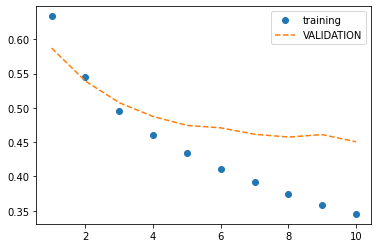

In [19]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

In [20]:
model2.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.4631 - accuracy: 0.8490


[0.46313002705574036, 0.8489599823951721]

In [21]:
##REGULARIZACIÓN
from keras import regularizers

In [31]:
### GENERAMOS EL MODELO EL MODELO
model3=models.Sequential()
### ESTRUCTURAS DE SED DE DATOS GENERALENTE SE TRABAJAN CON CAPAS DENSAS
model3.add(layers.Dense(16,activation="relu",input_shape=(10000,),kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001))) ## 10000 LAS PALABRAS QUE TIENE PARA LA CLASIFICACIÓN
model3.add(layers.Dense(16,activation="relu",kernel_regularizer=regularizers.l2(0.001))) ## PARA LAS DEMAS NO NECESITO SABER LAS ENTRADAS PORQUE SON DENSAS
model3.add(layers.Dense(1,activation="sigmoid")) ## NECESITAMOS SABER SOLAMENTE SI ES CERO O UNO POR ENDE ESCOGEMOS SIGMOID

In [32]:
model3.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics="accuracy")

In [33]:
history3=model3.fit(partial_X_train,partial_y_train,epochs=10,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/10
30/30 [==============================] - 9s 191ms/step - loss: 1.0508 - accuracy: 0.7310 - val_loss: 0.6883 - val_accuracy: 0.8280
Epoch 2/10
30/30 [==============================] - 3s 108ms/step - loss: 0.6493 - accuracy: 0.8268 - val_loss: 0.6259 - val_accuracy: 0.8423
Epoch 3/10
30/30 [==============================] - 1s 50ms/step - loss: 0.5943 - accuracy: 0.8477 - val_loss: 0.5871 - val_accuracy: 0.8549
Epoch 4/10
30/30 [==============================] - 1s 43ms/step - loss: 0.5679 - accuracy: 0.8557 - val_loss: 0.5919 - val_accuracy: 0.8340
Epoch 5/10
30/30 [==============================] - 1s 49ms/step - loss: 0.5531 - accuracy: 0.8565 - val_loss: 0.5560 - val_accuracy: 0.8574
Epoch 6/10
30/30 [==============================] - 3s 87ms/step - loss: 0.5367 - accuracy: 0.8631 - val_loss: 0.5372 - val_accuracy: 0.8633
Epoch 7/10
30/30 [==============================] - 1s 46ms/step - loss: 0.5317 - accuracy: 0.8619 - val_loss: 0.5347 - val_accuracy: 0.8644
Epoch 8/10


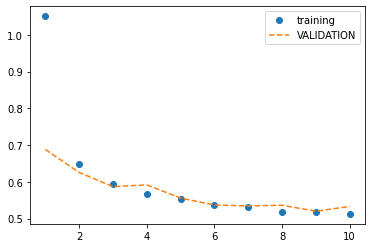

In [34]:
history_dict=history3.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

In [37]:
### DROP_OUT

## ES UNA CAPA

### GENERAMOS EL MODELO EL MODELO
model4=models.Sequential()
### ESTRUCTURAS DE SED DE DATOS GENERALENTE SE TRABAJAN CON CAPAS DENSAS
model4.add(layers.Dense(16,activation="relu",input_shape=(10000,))) ## 10000 LAS PALABRAS QUE TIENE PARA LA CLASIFICACIÓN
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16,activation="relu")) ## PARA LAS DEMAS NO NECESITO SABER LAS ENTRADAS PORQUE SON DENSAS
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1,activation="sigmoid")) ## NECESITAMOS SABER SOLAMENTE SI ES CERO O UNO POR ENDE ESCOGEMOS SIGMOID

In [38]:
model4.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics="accuracy")

In [40]:
history4=model4.fit(partial_X_train,partial_y_train,epochs=10,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/10
30/30 [==============================] - 7s 98ms/step - loss: 0.6168 - accuracy: 0.6600 - val_loss: 0.4966 - val_accuracy: 0.8294
Epoch 2/10
30/30 [==============================] - 1s 46ms/step - loss: 0.4833 - accuracy: 0.7905 - val_loss: 0.3848 - val_accuracy: 0.8762
Epoch 3/10
30/30 [==============================] - 2s 55ms/step - loss: 0.3972 - accuracy: 0.8452 - val_loss: 0.3218 - val_accuracy: 0.8829
Epoch 4/10
30/30 [==============================] - 2s 74ms/step - loss: 0.3367 - accuracy: 0.8757 - val_loss: 0.2872 - val_accuracy: 0.8883
Epoch 5/10
30/30 [==============================] - 1s 44ms/step - loss: 0.2870 - accuracy: 0.8969 - val_loss: 0.2749 - val_accuracy: 0.8893
Epoch 6/10
30/30 [==============================] - 1s 39ms/step - loss: 0.2524 - accuracy: 0.9127 - val_loss: 0.2758 - val_accuracy: 0.8915
Epoch 7/10
30/30 [==============================] - 1s 48ms/step - loss: 0.2208 - accuracy: 0.9272 - val_loss: 0.2795 - val_accuracy: 0.8888
Epoch 8/10
30

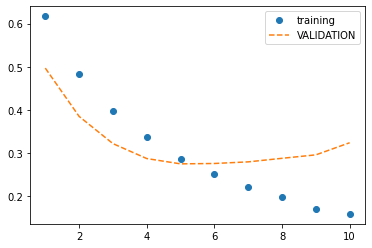

In [41]:
history_dict=history4.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()